PYTN-KS16-KELOMPOK 4

* Andhar Siraj Munir
* M. Rizqi Yuwanto
* M. Sadam Abdillah



# 1. PERKENALAN

## 1.1. Latar Belakang

Cuaca memainkan peran yang sangat penting dalam kehidupan manusia. Berbagai aktivitas sehari-hari manusia sangat tergantung pada kondisi cuaca. Oleh karena itu, prakiraan cuaca menjadi sangat penting bagi manusia agar dapat merencanakan aktivitas mereka dengan baik. Beberapa faktor alam yang dapat mempengaruhi cuaca antara lain suhu, kelembaban, tekanan udara, dan kecepatan angin. Di antara fenomena cuaca yang sangat memengaruhi kehidupan manusia adalah hujan. Oleh karena itu, diperlukan suatu analisis dan model yang dapat memprediksi kemungkinan terjadinya hujan agar manusia dapat mengatur aktivitas mereka secara lebih efektif.

## 1.2. Dataset

Dataset yang digunakan adalah dataset yang berjudul [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) yang berasal diambil dari website kaggle Rain in Australia

Dataset ini berisi tentang histori cuaca harian selama 10 tahun dari berbagai lokasi di Australia yang terdiri dari 145460 baris dan 23 atribut.

RainTommorow akan menjadi target variable yang akan diprediksi. Itu berarti apakah besok akan hujan, Ya atau Tidak? Kolom ini akan berisikan Ya apabila hujan di hari itu lebih dari atau sama dengan 1mm

## 1.3. Objektif Yang Ingin Dicapai

Objektif yang ingin dicapai melalui analisis yang dilakukan ini adalah :

Mengetahui faktor-faktor apa saja yang mempengaruhi cuaca di kemudian hari
Memprediksi apakah akan terjadi hujan di suatu tempat berdasarkan faktor-faktor yang mempengaruhi dengan menggunakan motode Logistic Regression dan SVM(Support Vector Machine)

# 2. IMPORT LIBRARY

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

# 3. DATA LOADING

In [2]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1-FANjYE05Zi04WoiBNvPsPmAgUV-4Dd2

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-FANjYE05Zi04WoiBNvPsPmAgUV-4Dd2
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 45.5MB/s]


In [3]:
# Read Dataset
data = pd.read_csv('weatherAUS.csv')
# Menampilkan Dataset
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# 4. Eksplorasi Data Analisis

## 4.1 Informasi Data

Menampilkan 5 data teratas

In [4]:
df = pd.DataFrame(data)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Menampilkan 5 data terakhir

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Menampilkan dimensi dataset

In [6]:
df.shape

(145460, 23)

Terdapat 693071 baris dan 57 kolom pada dataset.

Menampilkan informasi detail

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari informasi diatas terdapat 29 type data float, 17 type data integer, dan 11 type data object.

Menampilkan nama-nama kolom pada dataset

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Menampilkan ringkasan statistik dari kolom data numerik

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Menampilkan ringkasan statistik dari kolom data kategorikal

In [10]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Menampilkan nilai unik setiap kolom

In [11]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

Menampilkan missing value pada dataset

In [12]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
# Menghitung presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

Date               0.0 %
Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

In [14]:
# Daftar karakter yang digunakan untuk mengidentifikasi kekosongan
karakter_kosong = []

for kolom in df.columns:  # Mengganti 'df' dengan nama DataFrame Anda
    for nilai in df[kolom]:
        if pd.isna(nilai):
            continue  # Skip jika sudah NaN
        elif isinstance(nilai, str) and not nilai.strip():  # Periksa apakah string kosong atau hanya berisi spasi
            karakter_kosong.append(nilai)

karakter_kosong_unik = set(karakter_kosong)

print("Karakter yang mewakili kekosongan:", karakter_kosong_unik)

Karakter yang mewakili kekosongan: set()


Menampilkan data duplikat

In [15]:
df.duplicated().sum()

0

## 4.2 Distribusi Kolom RainTomorrow

In [16]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

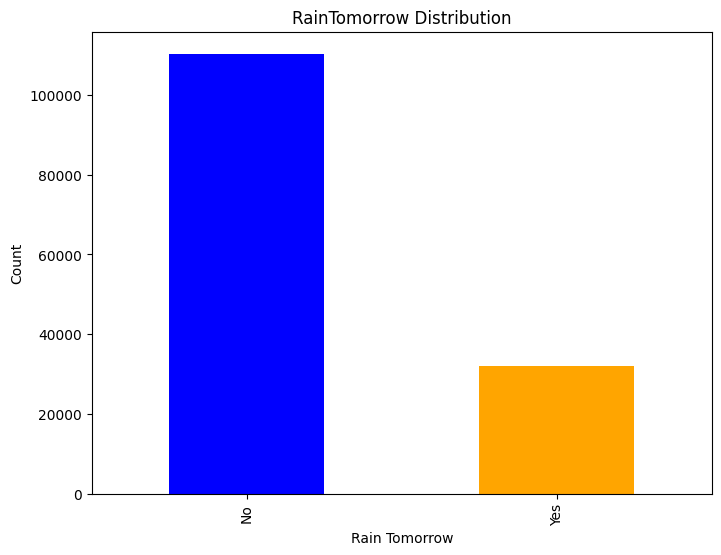

In [17]:
# Mengimport data
data = df['RainTomorrow'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color=['blue', 'orange'])

# Menambahkan judul dan label sumbu
plt.title('RainTomorrow Distribution')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

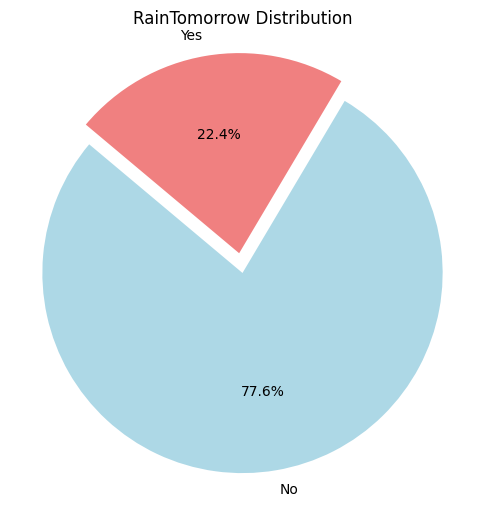

In [18]:
# Membuat pie chart
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Mengeksplosi "Yes"
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)

# Menambahkan judul
plt.title('RainTomorrow Distribution')

# Menampilkan plot
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Dari hasil penghitungan nilai counts pada kolom "RainTomorrow" dalam DataFrame "df", terdapat 110316 baris data dengan nilai "No" dan 31877 baris data dengan nilai "Yes". Hal ini menunjukkan bahwa mayoritas data (sekitar 77,6%) tidak menunjukkan kemungkinan hujan besok ("No"), sedangkan sekitar 22,4% data lainnya menunjukkan kemungkinan terjadinya hujan besok ("Yes"). Analisis ini dapat memberikan gambaran awal tentang sebaran data dan distribusinya, serta dapat digunakan untuk keperluan perencanaan atau prediksi cuaca di masa depan. Namun, untuk analisis yang lebih mendalam dan akurat, perlu dilakukan pengecekan lebih lanjut terhadap sumber data dan faktor-faktor yang memengaruhi hasil penghitungan tersebut.

## 4.3 Distribusi Kolom RainToday

In [19]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

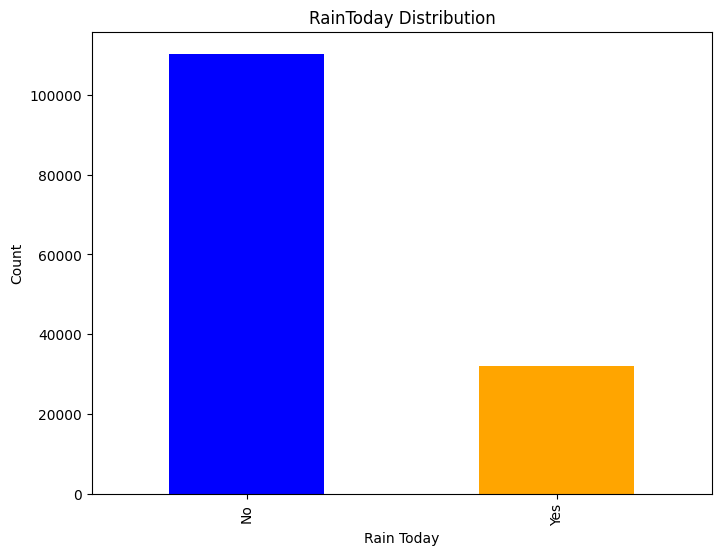

In [20]:
# Mengimport data
data = df['RainToday'].value_counts()

# Membuat bar chart
plt.figure(figsize=(8, 6))
data.plot(kind='bar', color=['blue', 'orange'])

# Menambahkan judul dan label sumbu
plt.title('RainToday Distribution')
plt.xlabel('Rain Today')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

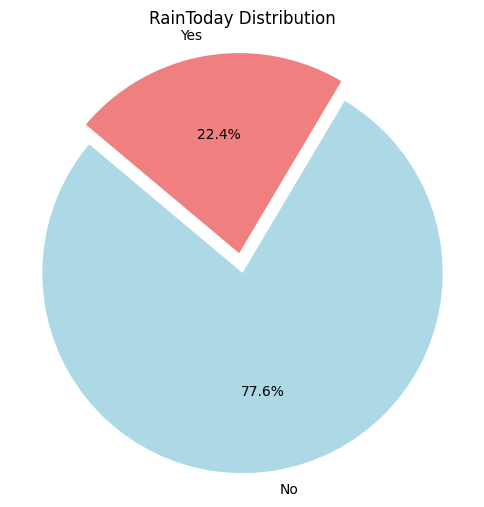

In [21]:
# Membuat pie chart
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Mengeksplosi "Yes"
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)

# Menambahkan judul
plt.title('RainToday Distribution')

# Menampilkan plot
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

Dari hasil penghitungan nilai counts pada kolom "RainToday" dalam DataFrame "df", terdapat 110319 baris data dengan nilai "No" dan 31880 baris data dengan nilai "Yes". Hal ini menunjukkan bahwa mayoritas data (sekitar 77,6%) tidak menunjukkan kemungkinan hujan besok ("No"), sedangkan sekitar 22,4% data lainnya menunjukkan kemungkinan terjadinya hujan besok ("Yes"). Hasil tersebut sama sperti data pada kolom 'RainTomorrow'

## 4.4 Distribuasi Kombinasi RainToday dan RainTomorrow

In [22]:
# Memeriksa kondisi "Yes" dan "Yes"
yes_yes_count = df[(df['RainToday'] == 'Yes') & (df['RainTomorrow'] == 'Yes')].shape[0]

# Memeriksa kondisi "No" dan "No"
no_no_count = df[(df['RainToday'] == 'No') & (df['RainTomorrow'] == 'No')].shape[0]

# Memeriksa kondisi "Yes" dan "No"
yes_no_count = df[(df['RainToday'] == 'Yes') & (df['RainTomorrow'] == 'No')].shape[0]

# Memeriksa kondisi "No" dan "Yes"
no_yes_count = df[(df['RainToday'] == 'No') & (df['RainTomorrow'] == 'Yes')].shape[0]

# Menampilkan jumlah data dalam setiap kondisi
print("Yes & Yes Count:", yes_yes_count)
print("No & No Count:", no_no_count)
print("Yes & No Count:", yes_no_count)
print("No & Yes Count:", no_yes_count)


Yes & Yes Count: 14597
No & No Count: 92728
Yes & No Count: 16858
No & Yes Count: 16604


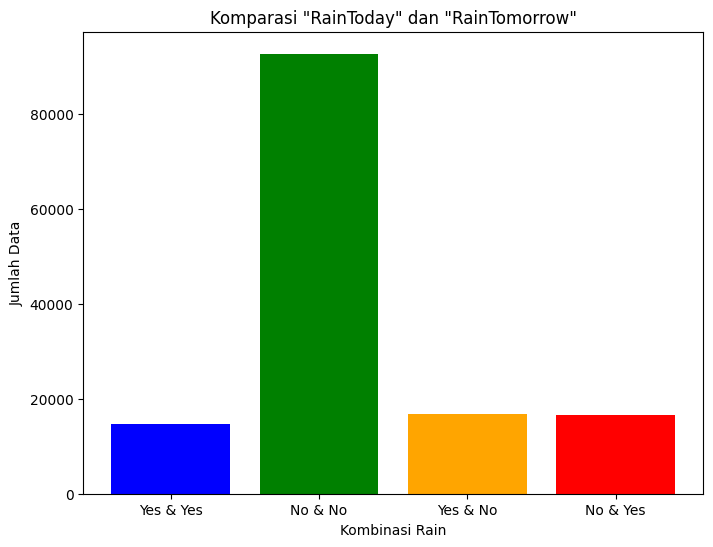

In [23]:
# Membuat bar chart
labels = ['Yes & Yes', 'No & No', 'Yes & No', 'No & Yes']
counts = [yes_yes_count, no_no_count, yes_no_count, no_yes_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green', 'orange', 'red'])

# Menambahkan judul dan label sumbu
plt.title('Komparasi "RainToday" dan "RainTomorrow"')
plt.xlabel('Kombinasi Rain')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

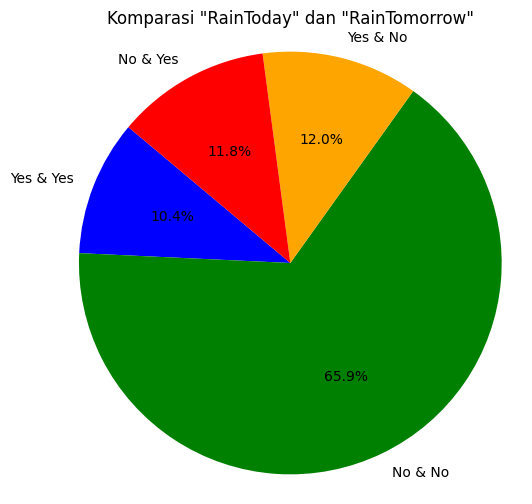

In [24]:
# Data untuk pie chart
labels = ['Yes & Yes', 'No & No', 'Yes & No', 'No & Yes']
sizes = [yes_yes_count, no_no_count, yes_no_count, no_yes_count]
colors = ['blue', 'green', 'orange', 'red']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Komparasi "RainToday" dan "RainTomorrow"')

# Menampilkan plot
plt.axis('equal')
plt.show()

Dari hasil perhitungan jumlah data dalam setiap kondisi kombinasi 'RainToday' dan 'RainTomorrow', kita dapat membuat kesimpulan sebagai berikut:

"Yes" dan "Yes" (Yes & Yes Count: 14,597): Ini mengindikasikan bahwa cuaca hujan hari ini (RainToday = Yes) dan cuaca hujan besok (RainTomorrow = Yes) terjadi pada 14,597 kasus.

"No" dan "No" (No & No Count: 92,728): Ini mengindikasikan bahwa cuaca tidak hujan hari ini (RainToday = No) dan cuaca tidak hujan besok (RainTomorrow = No) terjadi pada 92,728 kasus.

"Yes" dan "No" (Yes & No Count: 16,858): Ini mengindikasikan bahwa cuaca hujan hari ini (RainToday = Yes) tetapi cuaca tidak hujan besok (RainTomorrow = No) terjadi pada 16,858 kasus.

"No" dan "Yes" (No & Yes Count: 16,604): Ini mengindikasikan bahwa cuaca tidak hujan hari ini (RainToday = No) tetapi cuaca hujan besok (RainTomorrow = Yes) terjadi pada 16,604 kasus.

## 4.5 Distribusi data berdasarkan lokasi

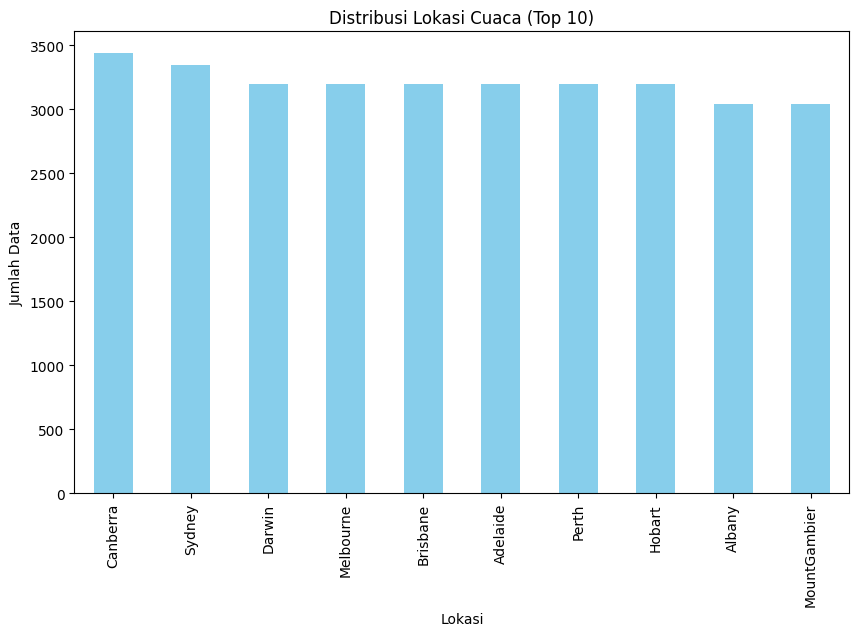

In [25]:
# Misalkan df adalah DataFrame Anda
location_counts = df['Location'].value_counts()

# Mengambil 10 lokasi teratas untuk visualisasi
top_10_locations = location_counts.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color='skyblue')
plt.title('Distribusi Lokasi Cuaca (Top 10)')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)  # Untuk memutar label sumbu x jika perlu

# Menampilkan plot
plt.show()


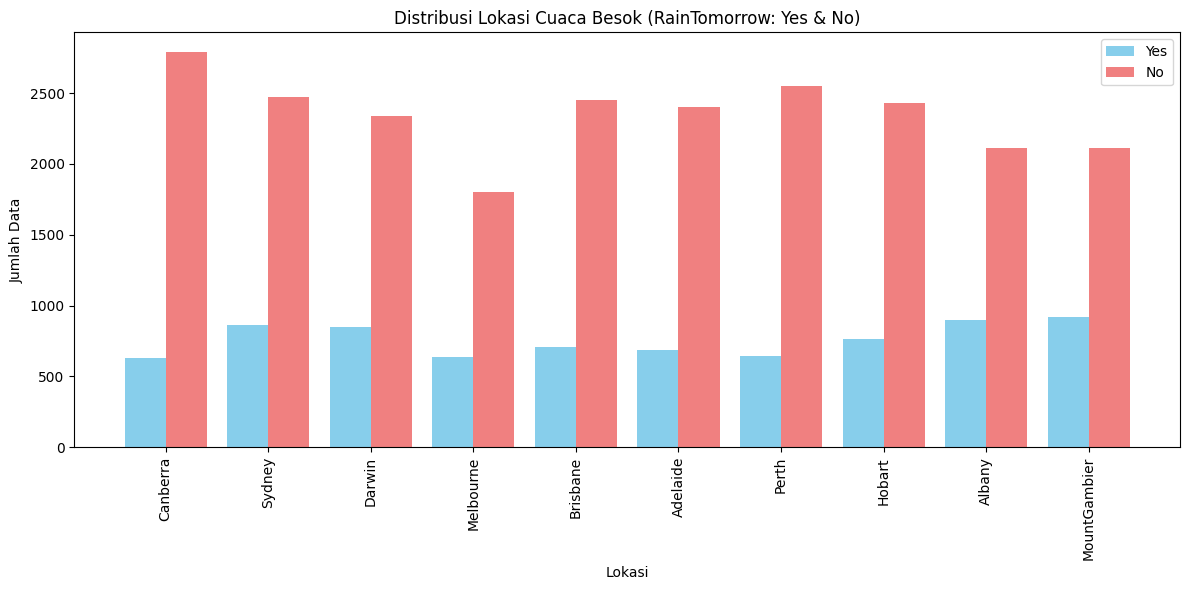

In [26]:
# Filter data berdasarkan "RainTomorrow" == "Yes"
rain_tomorrow_yes = df[df['RainTomorrow'] == 'Yes']

# Filter data berdasarkan "RainTomorrow" == "No"
rain_tomorrow_no = df[df['RainTomorrow'] == 'No']

# Membuat DataFrame terpisah untuk "Yes" dan "No" berdasarkan "RainTomorrow"
location_counts_yes = rain_tomorrow_yes['Location'].value_counts()
location_counts_no = rain_tomorrow_no['Location'].value_counts()

# Membuat bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart untuk "RainTomorrow" == "Yes"
bar_width = 0.4
bar_positions = range(len(top_10_locations))
ax.bar(bar_positions, location_counts_yes.loc[top_10_locations.index], width=bar_width, color='skyblue', label='Yes')

# Bar chart untuk "RainTomorrow" == "No" (bersebelahan dengan "Yes")
ax.bar([pos + bar_width for pos in bar_positions], location_counts_no.loc[top_10_locations.index], width=bar_width, color='lightcoral', label='No')

ax.set_title('Distribusi Lokasi Cuaca Besok (RainTomorrow: Yes & No)')
ax.set_xlabel('Lokasi')
ax.set_ylabel('Jumlah Data')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(top_10_locations.index)
ax.tick_params(axis='x', rotation=90)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

## 4.6 Distribusi Rainfall

Berdasarkan distribusi data diatas, dapat disimpulkan sebagai berikut:

Seluruh kota pada top 10 distribusi data memiliki jumlah hari yang lebih banyak "No" (tidak hujan) daripada "Yes" (hujan besok).

Kota-kota seperti Sydney, Darwin, Hobart, Albany  dan MountGambier masih cenderung memiliki lebih banyak hari "Yes" (hujan) dibandingkan kota lainya

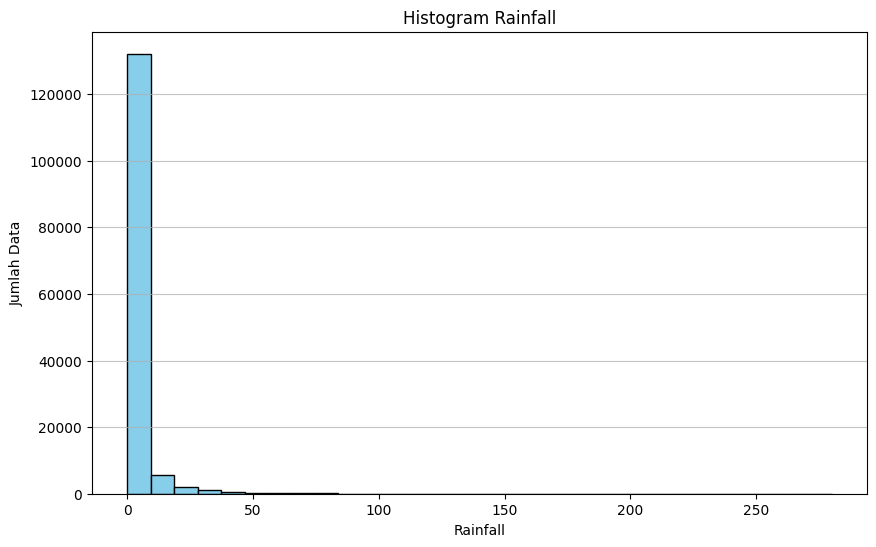

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rainfall'], bins=30, range=(0, 280), color='skyblue', edgecolor='black')
plt.title('Histogram Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', alpha=0.75)

plt.show()

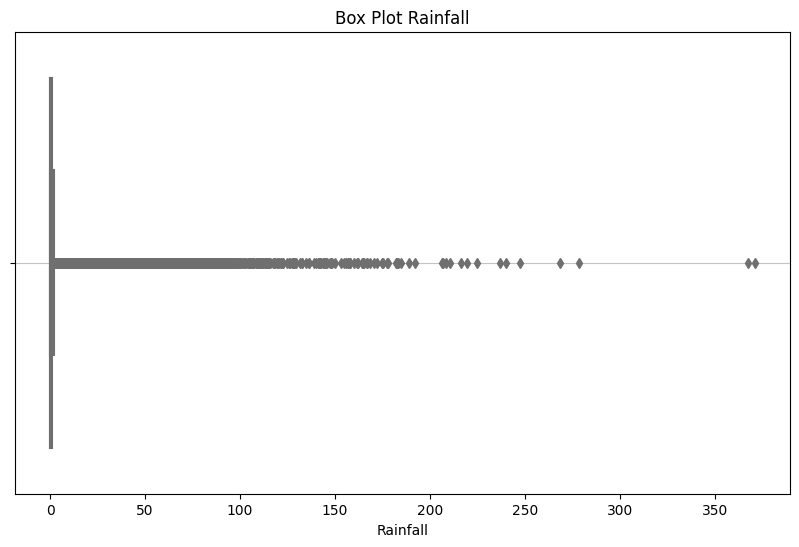

In [28]:
import seaborn as sns

# Misalkan df adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rainfall'].dropna(), color='skyblue')
plt.title('Box Plot Rainfall')
plt.xlabel('Rainfall')
plt.grid(axis='y', alpha=0.75)
plt.show()


Berdasarkan distribusi 'RainFall' disimpulkan bahwa histogram mencerminkan sebaran data cuaca yang variabel, dengan mayoritas hari cuaca memiliki hujan dalam jumlah yang relatif rendah hingga sedang, sementara hujan deras terjadi dalam situasi yang jarang terjadi.

## 4.7 Distribusi Sunshine

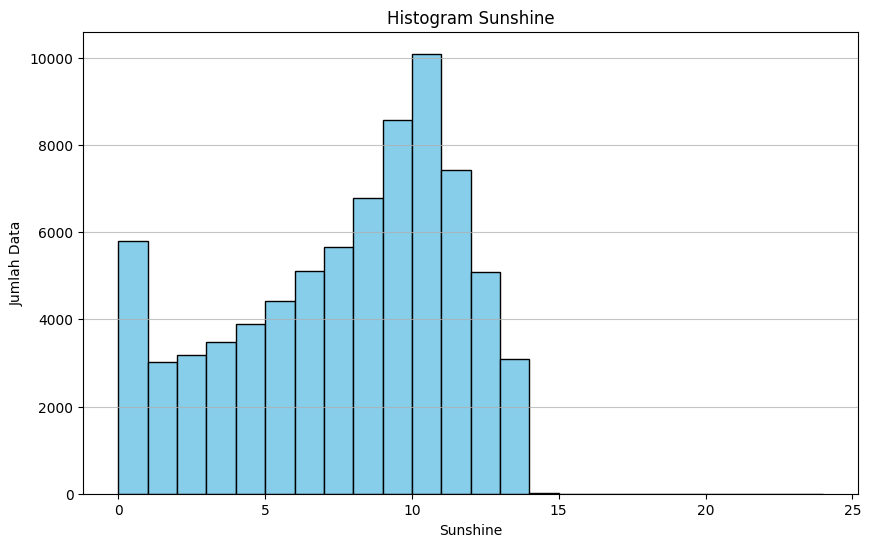

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sunshine'], bins=24, range=(0, 24), color='skyblue', edgecolor='black')
plt.title('Histogram Sunshine')
plt.xlabel('Sunshine')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', alpha=0.75)

plt.show()

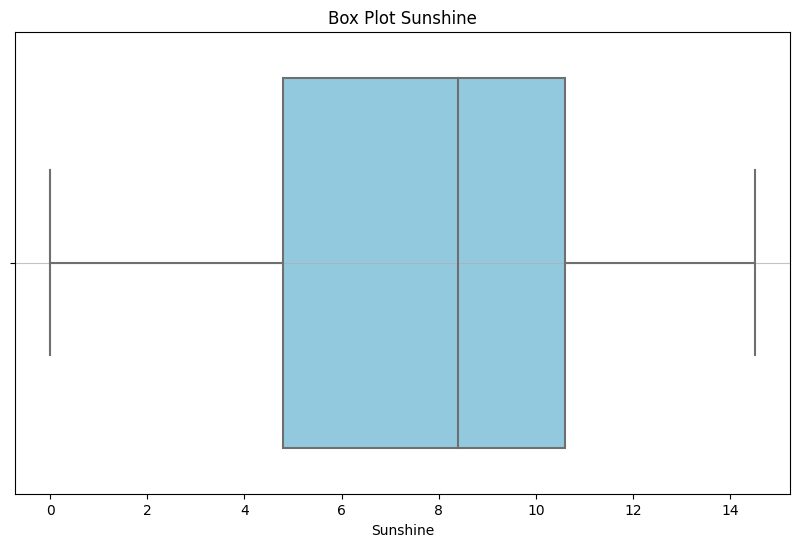

In [30]:
import seaborn as sns

# Misalkan df adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sunshine'].dropna(), color='skyblue')
plt.title('Box Plot Sunshine')
plt.xlabel('Sunshine')
plt.grid(axis='y', alpha=0.75)
plt.show()


Berdasarkan distribusi 'Sunshine' disimpulkan bahwa histogram mencerminkan waktu (dalam jam) ketika matahari bersinar sepanjang hari. Distribusi data menunjukkan bahwa matahari bersinar paling lama pada waktu-waktu tertentu, dengan puncak frekuensi terjadi pada interval waktu antara 9 jam hingga 14 jam.

## 4.8 Distribusi WinGustDir

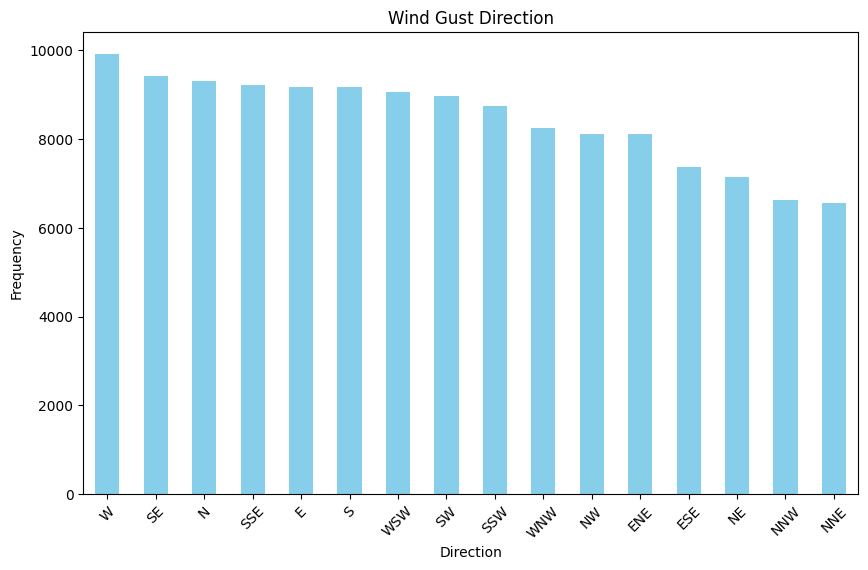

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['WindGustDir'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Wind Gust Direction')
plt.xlabel('Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Berdasarkan distribusi 'WinGustDir' dapat disimpulkan sebagai berikut:

Arah Angin Utama: Arah angin utama yang paling umum terjadi adalah "W" (Barat), diikuti oleh "SE" (Tenggara) dan "N" (Utara).

Variasi Arah Angin: Data menunjukkan variasi yang signifikan dalam arah angin, dengan berbagai arah angin yang tercatat. Arah angin "NNW" (Barat Laut) dan "NNE" (Timur Laut) adalah yang paling jarang terjadi.

## 4.9 Distribusi WindGustSpeed

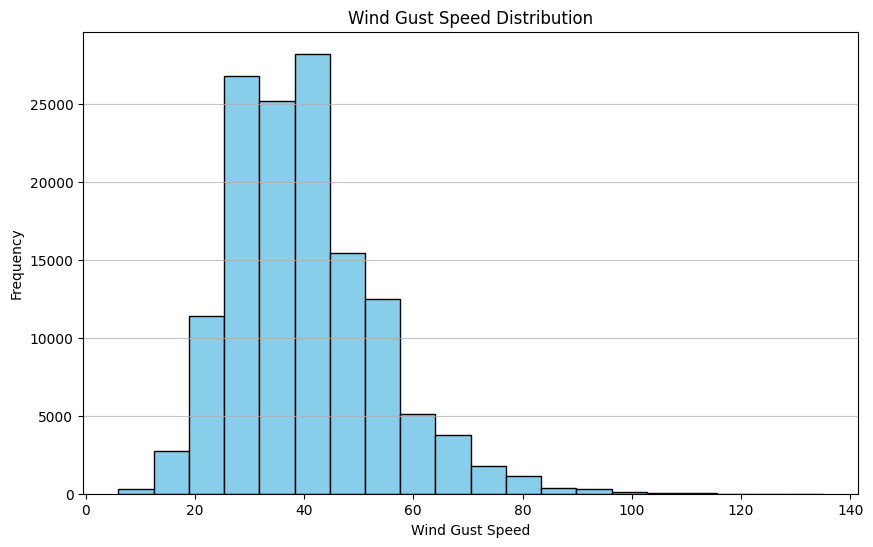

In [32]:
plt.figure(figsize=(10, 6))
df['WindGustSpeed'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Wind Gust Speed Distribution')
plt.xlabel('Wind Gust Speed')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Berdasarkan distribusi 'WindGustSpeed' dapat disimpulkan sebagai berikut:

Kecepatan Angin Tertinggi: Kecepatan angin paling sering tercatat berkisar antara 25.35 hingga 38.25 km/jam. Frekuensi tertinggi terjadi di rentang kecepatan angin ini.

Variabilitas Kecepatan Angin: Data menunjukkan variasi kecepatan angin yang signifikan, mulai dari 6.00 hingga 128.55 km/jam. Namun, frekuensi menurun secara signifikan saat kecepatan angin melebihi 70 km/jam.

Frekuensi Tinggi: Frekuensi tertinggi terjadi pada kecepatan angin berkisar antara 25.35 hingga 38.25 km/jam. Ini menunjukkan bahwa kebanyakan kecepatan angin dalam kisaran ini.

Kecepatan Angin Rendah: Kecepatan angin di bawah 25.35 km/jam memiliki frekuensi yang lebih rendah, menunjukkan bahwa kecepatan angin rendah tidak terlalu umum.

## 4.10 WinDir 9am & 3pm

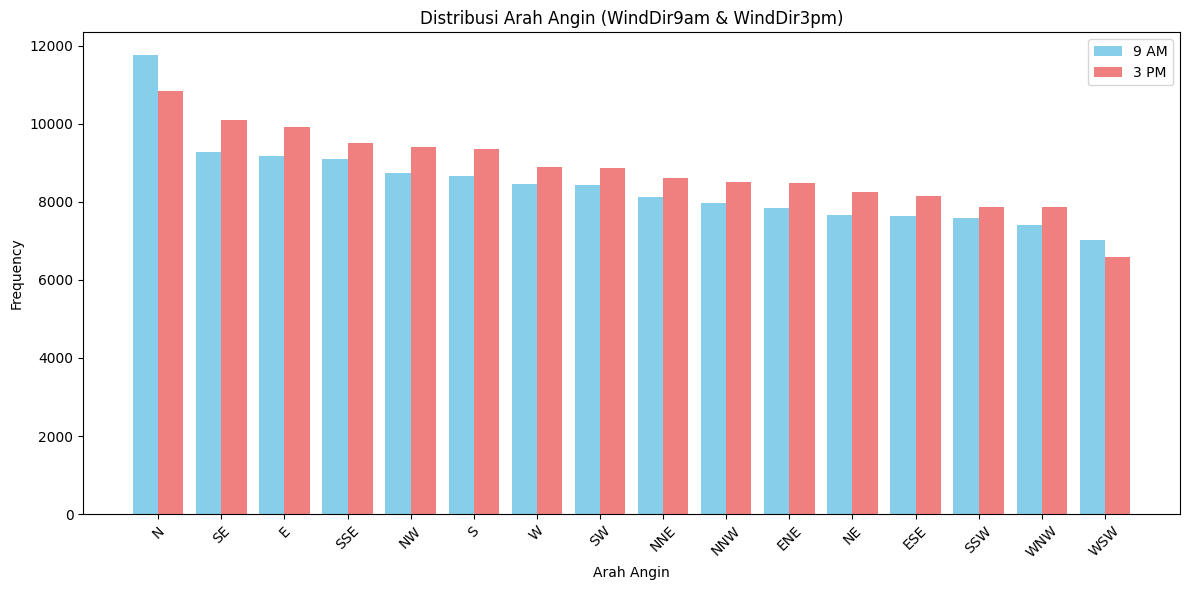

In [33]:
# Menghitung frekuensi arah angin pada pukul 9 pagi
wind_dir_9am_counts = df['WindDir9am'].value_counts()
# Menghitung frekuensi arah angin pada pukul 3 sore
wind_dir_3pm_counts = df['WindDir3pm'].value_counts()

# Membuat gambar dan sumbu
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart untuk "WindDir9am"
bar_width = 0.4
bar_positions = range(len(wind_dir_9am_counts))
ax.bar(bar_positions, wind_dir_9am_counts, width=bar_width, color='skyblue', label='9 AM')

# Bar chart untuk "WindDir3pm" (bersebelahan dengan "WindDir9am")
ax.bar([pos + bar_width for pos in bar_positions], wind_dir_3pm_counts, width=bar_width, color='lightcoral', label='3 PM')

ax.set_title('Distribusi Arah Angin (WindDir9am & WindDir3pm)')
ax.set_xlabel('Arah Angin')
ax.set_ylabel('Frequency')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(wind_dir_9am_counts.index)
ax.tick_params(axis='x', rotation=45)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari distibrusi data diatas dapat disimpulkan sebagai berikut:

Arah angin yang paling umum pada kedua waktu (pukul 9 pagi dan pukul 3 sore) adalah "N" (Utara), yang memiliki frekuensi tertinggi.

Arah angin "SE" (Tenggara), "E" (Timur), dan "SSE" (Selatan Tenggara) juga cukup umum pada kedua waktu.

Arah angin "WSW" (Barat Daya) memiliki frekuensi yang lebih rendah dibandingkan dengan yang lain pada pukul 9 pagi, sedangkan "NNE" (Utara Laut) dan "NNW" (Utara Barat Laut) lebih rendah pada pukul 3 sore.

Beberapa arah angin memiliki perubahan frekuensi yang cukup signifikan antara pukul 9 pagi dan pukul 3 sore, seperti "S" (Selatan) yang mengalami penurunan dan "NE" (Timur Laut) yang mengalami peningkatan.

## 4.11 Distribusi Humidity9am & Huidity3pm

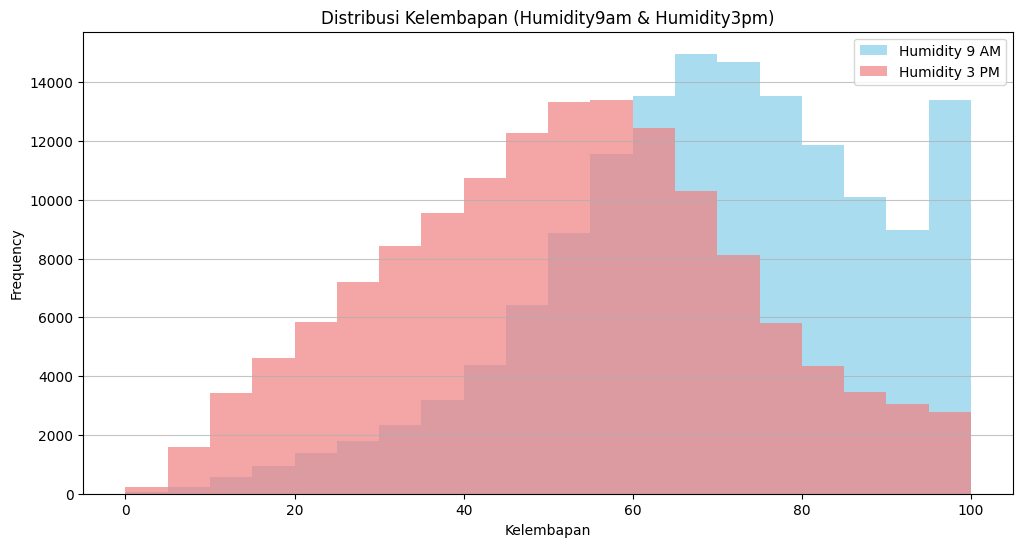

In [34]:
import matplotlib.pyplot as plt

# Data kelembapan pukul 9 pagi
humidity_9am = df['Humidity9am'].dropna()

# Data kelembapan pukul 3 sore
humidity_3pm = df['Humidity3pm'].dropna()

# Membuat histogram
plt.figure(figsize=(12, 6))
plt.hist(humidity_9am, bins=20, color='skyblue', alpha=0.7, label='Humidity 9 AM')
plt.hist(humidity_3pm, bins=20, color='lightcoral', alpha=0.7, label='Humidity 3 PM')
plt.title('Distribusi Kelembapan (Humidity9am & Humidity3pm)')
plt.xlabel('Kelembapan')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()


Dari distribusi data diatass dapat disimpulkan sebagai berikut:

Data kelembapan pada pukul 9 pagi (Humidity9am) dan pukul 3 sore (Humidity3pm) terdistribusi pada beberapa rentang kelembapan yang berbeda.

Rentang kelembapan dari 0.0 hingga 50.0 memiliki frekuensi yang lebih tinggi, terutama pada kelembapan pada pukul 9 pagi (Humidity9am).

Rentang kelembapan pada pukul 3 sore (Humidity3pm) cenderung lebih tinggi dibandingkan dengan kelembapan pada pukul 9 pagi (Humidity9am) dalam rentang yang lebih luas.

Secara umum, kelembapan pada pukul 3 sore (Humidity3pm) cenderung lebih tinggi daripada kelembapan pada pukul 9 pagi (Humidity9am).

## 4.12 Distribusi Temp9am & Temp3am

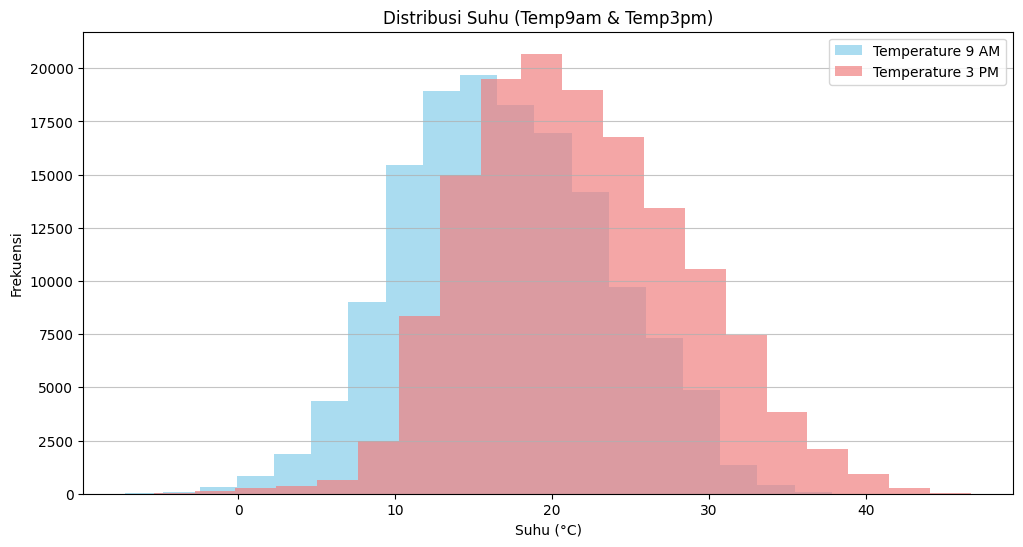

In [35]:
# Data suhu pukul 9 pagi
temp_9am = df['Temp9am'].dropna()

# Data suhu pukul 3 sore
temp_3pm = df['Temp3pm'].dropna()

# Membuat histogram
plt.figure(figsize=(12, 6))
plt.hist(temp_9am, bins=20, color='skyblue', alpha=0.7, label='Temperature 9 AM')
plt.hist(temp_3pm, bins=20, color='lightcoral', alpha=0.7, label='Temperature 3 PM')
plt.title('Distribusi Suhu (Temp9am & Temp3pm)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

Dari distribusi data diatas dapat disimpulkan sebagai berikut:

Rentang suhu pada pukul 9 pagi (Temp9am) dan pukul 3 sore (Temp3pm) disajikan dalam kelompok bin suhu.

Rentang suhu berkisar dari -7.200 hingga 44.005.

Terdapat perbedaan dalam frekuensi suhu antara pukul 9 pagi dan pukul 3 sore:

Suhu pada pukul 3 sore (Temp3pm) cenderung lebih tinggi dibandingkan dengan suhu pada pukul 9 pagi (Temp9am) di hampir semua bin suhu.
Frekuensi tertinggi terjadi pada bin suhu antara 19.750 hingga 22.445 pada pukul 9 pagi (Temp9am) dan 27.835 hingga 30.530 pada pukul 3 sore (Temp3pm).

Pada pukul 3 sore (Temp3pm), ada peningkatan signifikan dalam frekuensi suhu di bin suhu yang lebih tinggi, khususnya pada bin suhu di atas 33.225.

Sebagian besar bin suhu memiliki frekuensi yang lebih tinggi pada pukul 3 sore (Temp3pm) dibandingkan dengan pukul 9 pagi (Temp9am), menunjukkan tren umum peningkatan suhu seiring berjalannya waktu.

Data ini memberikan wawasan tentang perubahan suhu selama hari dan perbedaan suhu antara pukul 9 pagi dan 3 sore.

# 5. Data Preprocessing

## 5.1 Penangan terhadap data null

In [36]:
# drop kolom tanggal
df.drop('Date', axis=1, inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [37]:
# Menampilkan kembali presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

### 5.1.1 Drop kolom dengan presentase nul >30%

In [38]:
df.drop('Location', axis=1, inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [39]:
# drop kolom dengan presentase null 30% karena kolom dengan null yang tinggi akan memberikan pengaruh yang signifikan
missing_val = pd.DataFrame(df.isnull().sum(), columns=['missing_count'])
missing_val['total_count'] = df.shape[0]
missing_val['persentase_nan(%)'] = (missing_val['missing_count'] / missing_val['total_count']) * 100
missing_val = missing_val[missing_val['persentase_nan(%)']>30]
missing_val

,missing_count,total_count,persentase_nan(%)
Evaporation,62790,145460,43.166506
Sunshine,69835,145460,48.009762
Cloud9am,55888,145460,38.421559
Cloud3pm,59358,145460,40.807095


In [40]:
list_missing_val = missing_val.index.tolist()
list_missing_val

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [41]:
df.drop(list_missing_val, axis=1, inplace=True)

In [42]:
df.head(3)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No


In [43]:
# Menampilkan kembali presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

### 5.1.2 Mengisi nilai rata-rata pada data null di kolom numerik

In [44]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [45]:
# membagi menjadi kaegorikal dan numerikal
categorical = [cols for cols in df.columns if df[cols].dtypes=='object']
numerical = [cols for cols in df.columns if df[cols].dtypes=='float64']

In [46]:
# mengisi nilai rata-rata pada kolom numerik
for col in numerical:
    df[col].fillna(df[col].mean(), inplace=True)

In [47]:
# Menampilkan kembali presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

MinTemp           0.0 %
MaxTemp           0.0 %
Rainfall          0.0 %
WindGustDir       7.1 %
WindGustSpeed     0.0 %
WindDir9am       7.26 %
WindDir3pm       2.91 %
WindSpeed9am      0.0 %
WindSpeed3pm      0.0 %
Humidity9am       0.0 %
Humidity3pm       0.0 %
Pressure9am       0.0 %
Pressure3pm       0.0 %
Temp9am           0.0 %
Temp3pm           0.0 %
RainToday        2.24 %
RainTomorrow     2.25 %
dtype: object

In [48]:
# drop baris pada kolom yang masih memiliki nilai null
missing_val = pd.DataFrame(df.isnull().sum(), columns=['missing_count'])
missing_val['total_count'] = df.shape[0]
missing_val['persentase_nan(%)'] = (missing_val['missing_count'] / missing_val['total_count']) * 100
missing_val = missing_val[missing_val['persentase_nan(%)']>0]
missing_val

,missing_count,total_count,persentase_nan(%)
WindGustDir,10326,145460,7.098859
WindDir9am,10566,145460,7.263853
WindDir3pm,4228,145460,2.906641
RainToday,3261,145460,2.241853
RainTomorrow,3267,145460,2.245978


In [49]:
list_missing_val = missing_val.index.tolist()
list_missing_val

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [50]:
df.dropna(subset=list_missing_val, axis=0, inplace=True)
df.head(3)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No


In [51]:
# Menampilkan kembali presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

MinTemp          0.0 %
MaxTemp          0.0 %
Rainfall         0.0 %
WindGustDir      0.0 %
WindGustSpeed    0.0 %
WindDir9am       0.0 %
WindDir3pm       0.0 %
WindSpeed9am     0.0 %
WindSpeed3pm     0.0 %
Humidity9am      0.0 %
Humidity3pm      0.0 %
Pressure9am      0.0 %
Pressure3pm      0.0 %
Temp9am          0.0 %
Temp3pm          0.0 %
RainToday        0.0 %
RainTomorrow     0.0 %
dtype: object

## 5.2 Label encod

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df = df.copy()

label_mappings = {}  # Membuat kamus kosong untuk menyimpan label mappings

for kolom in new_df.columns:
    le.fit(new_df[kolom])
    new_df[kolom] = le.transform(new_df[kolom])

    if kolom in categorical:
        print(f"kolom = {kolom}")
        label_mapping = {label: code for label, code in zip(le.classes_, le.transform(le.classes_))}
        label_mappings[kolom] = label_mapping  # Menambahkan label mapping ke kamus
        for label, code in label_mapping.items():
            print(f"label asli: {label} label encode: {code}")
        print()

new_df

kolom = WindGustDir
label asli: E label encode: 0
label asli: ENE label encode: 1
label asli: ESE label encode: 2
label asli: N label encode: 3
label asli: NE label encode: 4
label asli: NNE label encode: 5
label asli: NNW label encode: 6
label asli: NW label encode: 7
label asli: S label encode: 8
label asli: SE label encode: 9
label asli: SSE label encode: 10
label asli: SSW label encode: 11
label asli: SW label encode: 12
label asli: W label encode: 13
label asli: WNW label encode: 14
label asli: WSW label encode: 15

kolom = WindDir9am
label asli: E label encode: 0
label asli: ENE label encode: 1
label asli: ESE label encode: 2
label asli: N label encode: 3
label asli: NE label encode: 4
label asli: NNE label encode: 5
label asli: NNW label encode: 6
label asli: NW label encode: 7
label asli: S label encode: 8
label asli: SE label encode: 9
label asli: SSE label encode: 10
label asli: SSW label encode: 11
label asli: SW label encode: 12
label asli: W label encode: 13
label asli: WN

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,213,258,6,13,20,13,14,10,12,72,22,214,230,221,262,0,0
1,152,281,0,14,20,6,15,1,11,44,25,243,237,225,287,0,0
2,208,287,0,15,21,13,15,9,13,38,30,213,246,263,276,0,0
3,170,310,0,4,9,9,0,5,4,45,16,313,287,234,309,0,0
4,254,353,10,13,18,1,7,3,10,83,33,245,219,231,341,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,113,247,0,0,13,2,0,7,6,59,27,385,372,146,252,0,0
145455,106,264,0,0,13,9,1,6,5,51,24,384,363,153,268,0,0
145456,114,283,0,6,8,9,3,6,4,56,21,373,351,161,289,0,0
145457,132,299,0,3,16,9,14,4,4,53,24,348,328,177,305,0,0


In [53]:
label_mappings

{'WindGustDir': {'E': 0,
  'ENE': 1,
  'ESE': 2,
  'N': 3,
  'NE': 4,
  'NNE': 5,
  'NNW': 6,
  'NW': 7,
  'S': 8,
  'SE': 9,
  'SSE': 10,
  'SSW': 11,
  'SW': 12,
  'W': 13,
  'WNW': 14,
  'WSW': 15},
 'WindDir9am': {'E': 0,
  'ENE': 1,
  'ESE': 2,
  'N': 3,
  'NE': 4,
  'NNE': 5,
  'NNW': 6,
  'NW': 7,
  'S': 8,
  'SE': 9,
  'SSE': 10,
  'SSW': 11,
  'SW': 12,
  'W': 13,
  'WNW': 14,
  'WSW': 15},
 'WindDir3pm': {'E': 0,
  'ENE': 1,
  'ESE': 2,
  'N': 3,
  'NE': 4,
  'NNE': 5,
  'NNW': 6,
  'NW': 7,
  'S': 8,
  'SE': 9,
  'SSE': 10,
  'SSW': 11,
  'SW': 12,
  'W': 13,
  'WNW': 14,
  'WSW': 15},
 'RainToday': {'No': 0, 'Yes': 1},
 'RainTomorrow': {'No': 0, 'Yes': 1}}

In [54]:
X = new_df.drop(['RainTomorrow'], axis=1)
y = new_df['RainTomorrow']
print(X.shape)
print(y.shape)

(123710, 16)
(123710,)


# 6. Modelling

## 6.1. Train Test Split

In [55]:
# test_size = 0.30 artinya data testing 30% dan data training 70%
# random_state = 1 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [56]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)

Dimensi feature data train : (86597, 16)
Dimensi target data train : (86597,)
Dimensi feature data test : (37113, 16)
Dimensi target data test : (37113,)


## 6.3 Logistic Regression

### 6.3.1 Pelatihan model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membuat model Logistic Regression
model_LR = LogisticRegression(random_state=42)

# Melakukan fitting pada data
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 6.3.2 Evaluasi Model

In [58]:
# Prediksi model
y_pred_LR = model_LR.predict(X_test)

# Menghitung metrik presisi, recall, dan F1-score
accuracy_lr = accuracy_score(y_test, y_pred_LR)
precision_lr = precision_score(y_test, y_pred_LR, average='weighted')
recall_lr = recall_score(y_test, y_pred_LR, average='weighted')
f1_lr = f1_score(y_test, y_pred_LR, average='weighted')

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-score:", f1_lr)

Logistic Regression Accuracy: 0.8391129792794978
Logistic Regression Precision: 0.827625031289573
Logistic Regression Recall: 0.8391129792794978
Logistic Regression F1-score: 0.8259354240847352


In [59]:
cm_lr = confusion_matrix(y_test, y_pred_LR)
cm_lr

array([[27312,  1545],
       [ 4426,  3830]])

In [60]:
tn, fp, fn, tp = cm_lr.ravel()

print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 27312
False Positive : 1545
False Negative : 4426
True Positive  : 3830


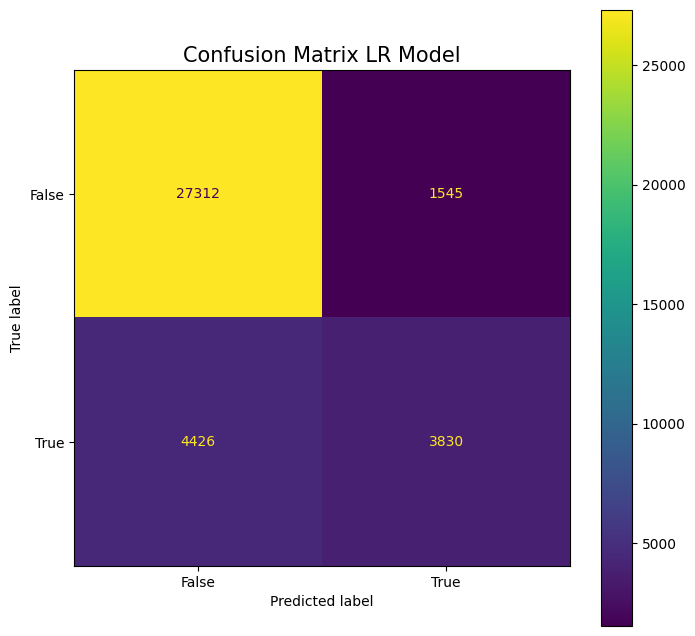

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cm_lr, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix LR Model', size=15)

plt.show()

In [62]:
print(f'Classification Report:\n{classification_report(y_test, y_pred_LR)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28857
           1       0.71      0.46      0.56      8256

    accuracy                           0.84     37113
   macro avg       0.79      0.71      0.73     37113
weighted avg       0.83      0.84      0.83     37113



## 6.4 Support Vector Machine

### 6.4.1 Hyperparameter tuning & pelatihan model

In [63]:
# Membuat model Support Vector Machine
model_SVM = SVC(random_state=42)

# Melakukan fitting pada data
model_SVM.fit(X_train, y_train)

SVC(random_state=42)

### 6.4.2 Evaluasi Model

In [64]:
# Prediksi model
y_pred_SVM = model_SVM.predict(X_test)

# Menghitung metrik presisi, recall, dan F1-score
accuracy_svm = accuracy_score(y_test, y_pred_SVM)
precision_svm = precision_score(y_test, y_pred_SVM, average='weighted')
recall_svm = recall_score(y_test, y_pred_SVM, average='weighted')
f1_svm = f1_score(y_test, y_pred_SVM, average='weighted')

print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-score:", f1_svm)

SVM Accuracy: 0.8418613423867648
SVM Precision: 0.8334269940847413
SVM Recall: 0.8418613423867648
SVM F1-score: 0.8228682342425029


In [65]:
cm_svm = confusion_matrix(y_test, y_pred_SVM)
cm_svm

array([[27840,  1017],
       [ 4852,  3404]])

In [66]:
tn, fp, fn, tp = cm_svm.ravel()

print(f'True Negative  : {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')
print(f'True Positive  : {tp}')

True Negative  : 27840
False Positive : 1017
False Negative : 4852
True Positive  : 3404


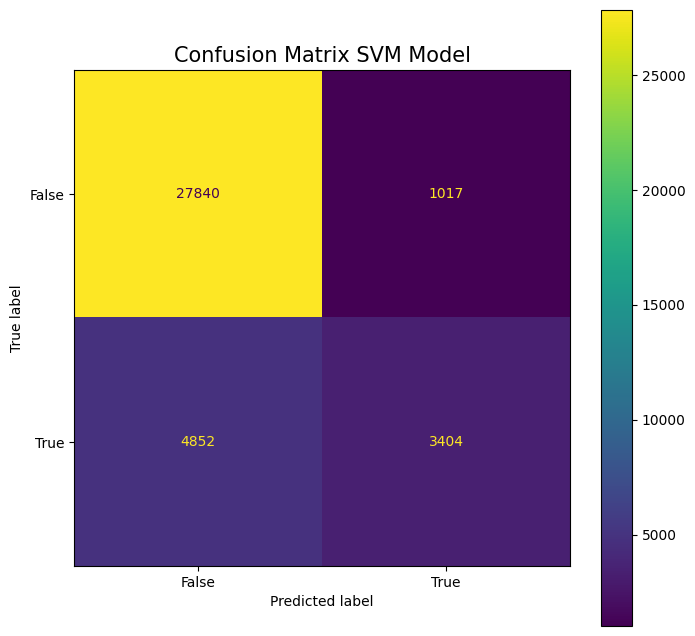

In [67]:
fig, ax = plt.subplots(figsize=(8,8))
cm_display = metrics.ConfusionMatrixDisplay(cm_svm, display_labels = [False, True])
cm_display.plot(ax=ax)
ax.grid(False)
ax.set_title('Confusion Matrix SVM Model', size=15)

plt.show()

In [68]:
print(f'Classification Report:\n{classification_report(y_test, y_pred_SVM)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     28857
           1       0.77      0.41      0.54      8256

    accuracy                           0.84     37113
   macro avg       0.81      0.69      0.72     37113
weighted avg       0.83      0.84      0.82     37113



# 7. Evaluasi

In [69]:
evaluasi = {'model': ['Logistic Regression', 'SVM'],
            'data latih': [X_train.shape[0], X_train.shape[0]],
            'data uji': [X_test.shape[0], X_test.shape[0]],
            'accuracy': [accuracy_lr, accuracy_svm],
            'precision': [precision_lr, precision_svm],
            'recall': [recall_lr, recall_svm],
            'f1-score': [f1_lr, f1_svm]}

evaluasi

{'model': ['Logistic Regression', 'SVM'],
 'data latih': [86597, 86597],
 'data uji': [37113, 37113],
 'accuracy': [0.8391129792794978, 0.8418613423867648],
 'precision': [0.827625031289573, 0.8334269940847413],
 'recall': [0.8391129792794978, 0.8418613423867648],
 'f1-score': [0.8259354240847352, 0.8228682342425029]}

In [70]:
import numpy as np

# Membulatkan semua angka dalam matriks evaluasi menjadi 2 digit dibelakang koma
for key in evaluasi:
    if key != 'model':
      evaluasi[key] = np.around(evaluasi[key], decimals=2)

# Menampilkan matriks evaluasi yang telah dibulatkan
print(evaluasi)


{'model': ['Logistic Regression', 'SVM'], 'data latih': array([86597, 86597]), 'data uji': array([37113, 37113]), 'accuracy': array([0.84, 0.84]), 'precision': array([0.83, 0.83]), 'recall': array([0.84, 0.84]), 'f1-score': array([0.83, 0.82])}


In [71]:
df_evaluasi = pd.DataFrame(evaluasi)
df_evaluasi

,model,data latih,data uji,accuracy,precision,recall,f1-score
0,Logistic Regression,86597,37113,0.84,0.83,0.84,0.83
1,SVM,86597,37113,0.84,0.83,0.84,0.82


Dalam evaluasi dua model klasifikasi, Logistic Regression dan Support Vector Machine (SVM), keduanya menunjukkan performa yang sangat baik pada dataset yang digunakan, dengan tingkat akurasi sekitar 0.84. Konsistensi kinerja antara data latih dan uji terlihat baik. Metrik precision, recall, dan F1-score juga mencapai nilai tinggi di atas 0.8, menunjukkan kemampuan keduanya dalam mengklasifikasikan positif dengan benar dan menangkap sebanyak mungkin instance positif. Meskipun terdapat sedikit perbedaan dalam beberapa metrik, seperti recall dan F1-score, antara kedua model, perbedaan tersebut tidak cukup signifikan.